In [1]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [2]:
data=pd.read_excel('/content/data_h.xlsx',header=None,names=['x','y'])

In [3]:
data.head()

,x,y
0,33.35,19.60
1,32.85,19.55
2,32.40,19.15
3,32.45,18.70
4,32.80,18.90


Text(0, 0.5, 'Y')

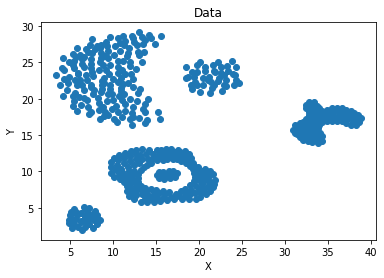

In [12]:
x1=data['x']
y1=data['y']
plt.scatter(x1,y1)
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")

# Agglomerative Clustering

In [3]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    childs = model.children_
    for i, merge in enumerate(childs):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    
#     print(linkage_matrix.shape)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




In [4]:
colors=10*["r","g","c","m","y","pink",'purple','yellow','aqua',"grey","indianred","cadetblue","salmon","sienna","dodgerblue","yellowgreen","skyblue","khaki","plum","gold","orchid","lime","b",'k']
def draw(labels,data):
  cvec = [colors[label] for label in labels]
  plt.scatter(data['x'], data['y'], c = cvec)
  plt.show()

In [8]:
def draw_agg(labels,data,dist):
  cvec = [colors[label] for label in labels]
  plt.scatter(data['x'], data['y'], c = cvec)
  plt.title('linkage: '+str(dist))
  plt.show()

In [23]:
def draw_div(clusters):
    for i, cluster in enumerate(clusters):    
      np_cluster = np.array(cluster)
      plt.scatter(np_cluster[:,0], np_cluster[:, 1], label = i)
    #plt.legend(bbox_to_anchor=(1.06, 1.06))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

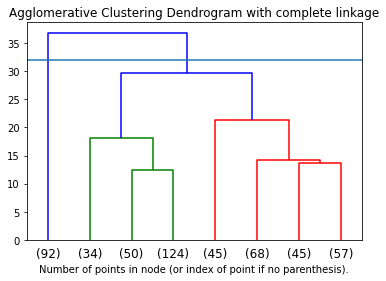

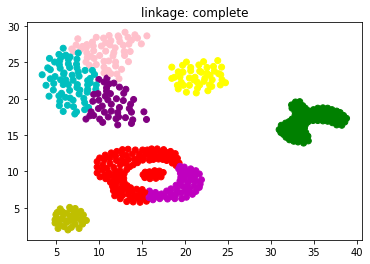

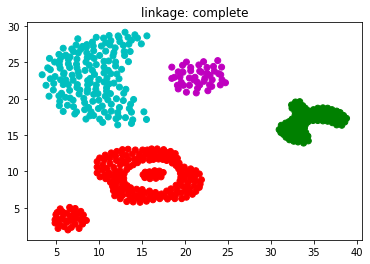

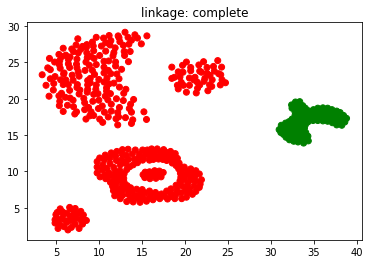

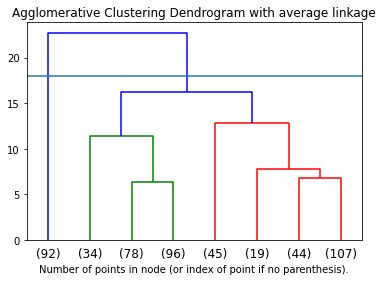

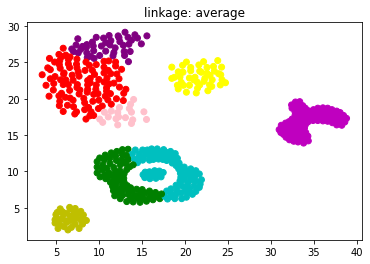

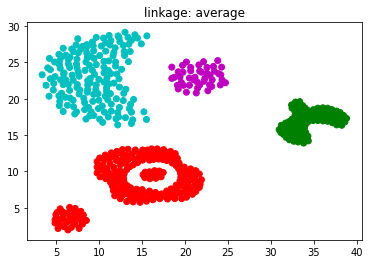

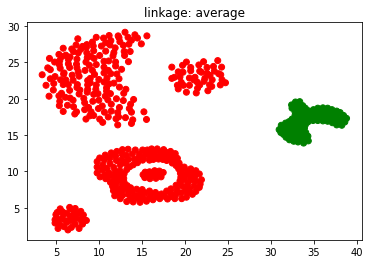

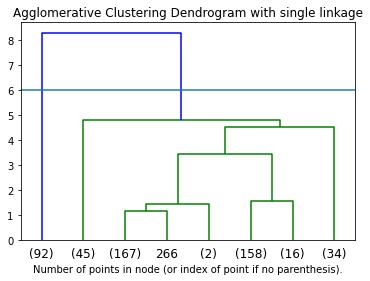

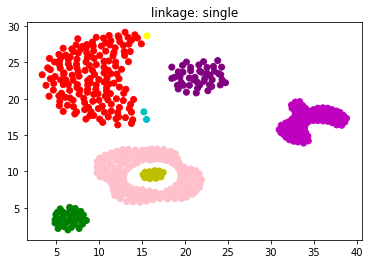

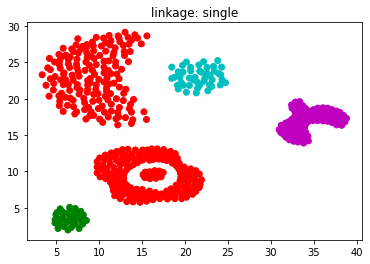

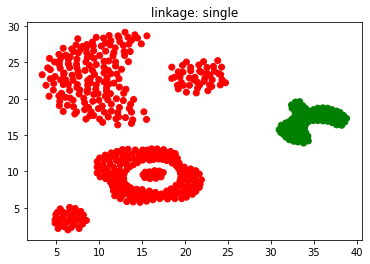

In [28]:
tresholds=[32,18,6]
for linkage in ['complete', 'average', 'single']:
  model = AgglomerativeClustering(n_clusters=2,linkage=linkage,compute_distances=True).fit(data)
  labels=model.labels_
  plt.title('Agglomerative Clustering Dendrogram with '+str(linkage)+" linkage")
  # plot the top three levels of the dendrogram
  #The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage;
  #they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.
  plot_dendrogram(model, truncate_mode='lastp', p=8)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  plt.axhline(y=tresholds[['complete', 'average', 'single'].index(linkage)])
  plt.show()
  for x in [8,4,2]:
    agc=AgglomerativeClustering(n_clusters=x,linkage=linkage).fit(data)
    labels=agc.labels_
    draw_agg(labels,data,linkage)

In [68]:
pip install scikit-learn==0.24

     |████████████████████████████████| 22.3 MB 127 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# result

results are the same using all three linkage criterias, but they all started from different starting point (different 8 clusters)
average and complete are similar


# Divisive Clustering

In [24]:
def distance(cluster1,cluster2,criteria):
  #single link
  if criteria=='s':
    return np.min(cdist(cluster1, cluster2,'euclidean'))
  #complete link
  elif criteria=='c':
    return np.max(cdist(cluster1, cluster2,'euclidean'))
  #average link
  elif criteria=='a':
    return np.mean(cdist(cluster1, cluster2,'euclidean'))


In [19]:
def divise(data, dist):
    clusters1 = [data.copy()]
    while len(clusters1) < 8:
        clusters=clusters1.copy()
        minimum = 0
        best_labels = []
        best_cluster = []
        new_clusters = []
        for cluster in clusters:
            kmeans = KMeans(n_clusters=2, random_state=0).fit(cluster)
            current_labels = kmeans.labels_
            child1 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==1])
            child2 = np.array([x for i, x in enumerate(cluster) if current_labels[i]==0])
            score = distance(child1,child2,dist)
            if score > minimum:
                minimum = score
                best_labels = current_labels
                best_cluster = cluster
                new_clusters = [child1.tolist(), child2.tolist()]
        clusters1.remove(best_cluster)
        clusters1 += new_clusters
        #if len(clusters1) in [2,4,8]:
        draw_div(clusters1)


# criteria: single

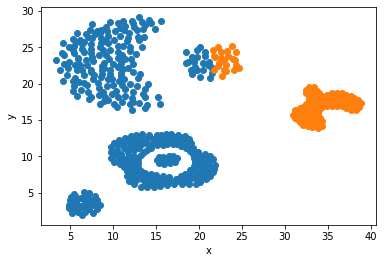

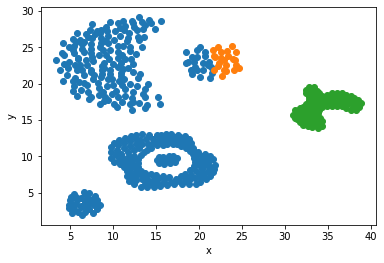

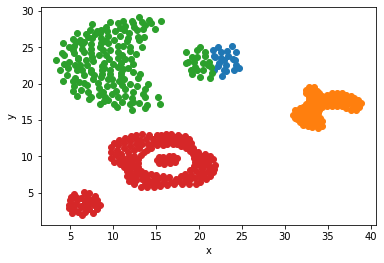

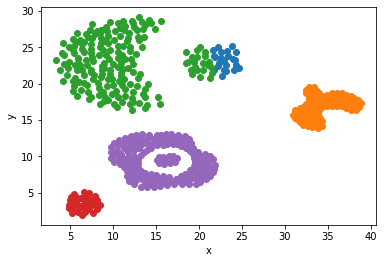

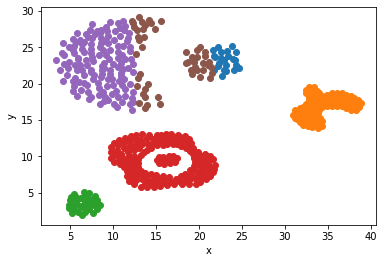

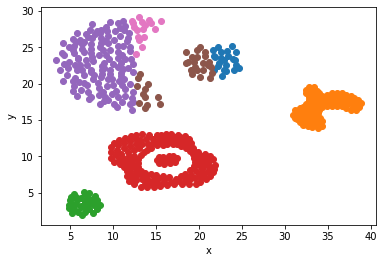

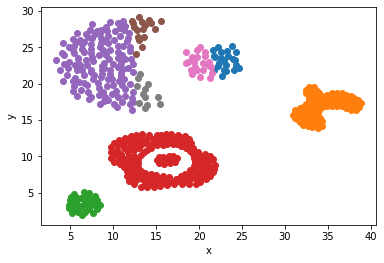

In [25]:
dataset=np.array(data)
divise(dataset,'s')

# criteria: complete

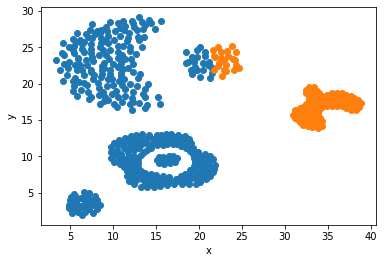

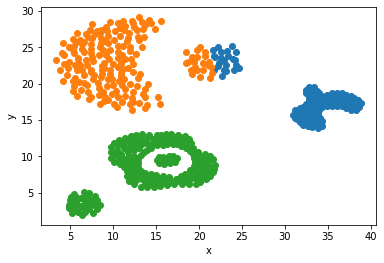

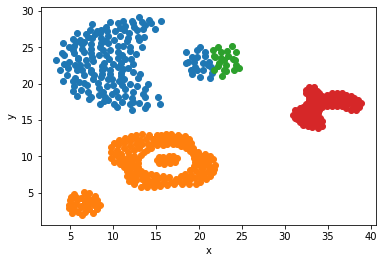

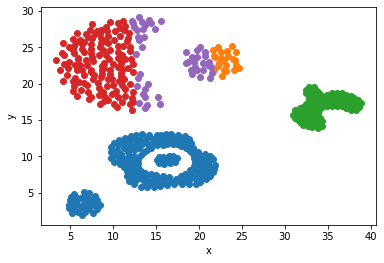

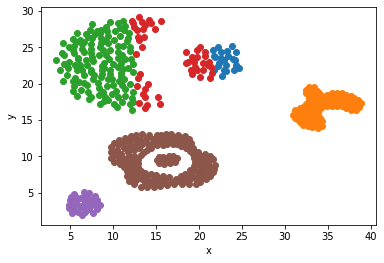

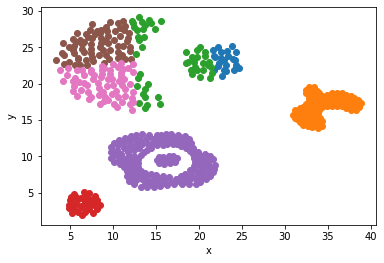

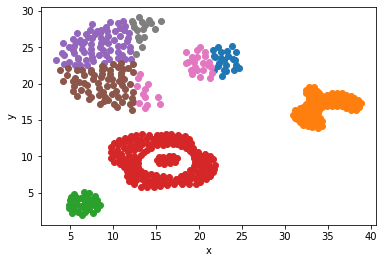

In [26]:
divise(dataset,'c')

# criteria: average 

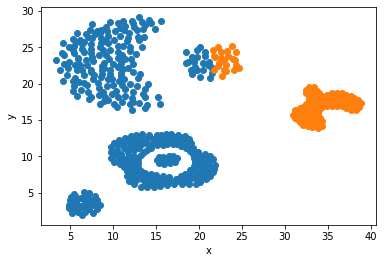

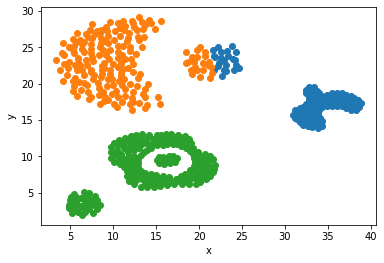

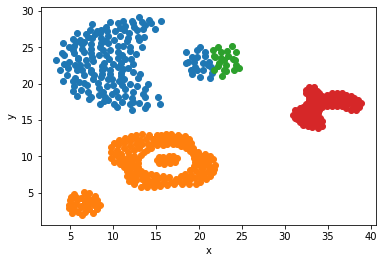

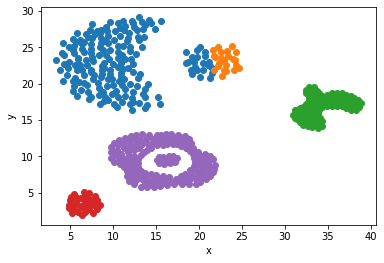

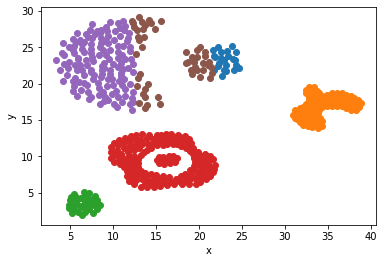

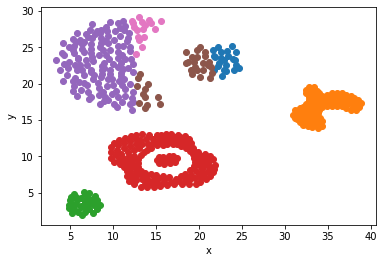

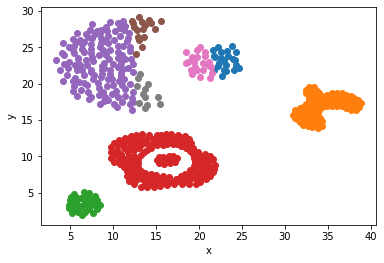

In [27]:
divise(dataset,'a')

# result

final result of single and average linkage are the same, but complete linkage clustered the lower part of the moon shape, as a part of the ball because with this criteria we aim to minimize the maximum distance and it is showing sesitivity to outliers